<a href="https://colab.research.google.com/github/matheustoneti/MilkQualityClustering/blob/main/Milk_quality_with_clustering_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from scipy.spatial.distance import cdist
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl

In [46]:
data = pd.read_csv('milknew.csv')
data.head(5)


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [47]:
data['Grade'] = data['Grade'].str.replace("low", '0').str.replace("medium", '1').str.replace("high", '2')

In [48]:
data.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [49]:
dados_cluster = data[['pH', 'Colour', 'Temprature','Grade']]

In [50]:
dados_cluster.head(5)

,pH,Colour,Temprature,Grade
0,6.6,254,35,2
1,6.6,253,36,2
2,8.5,246,70,0
3,9.5,255,34,0
4,6.6,255,37,1


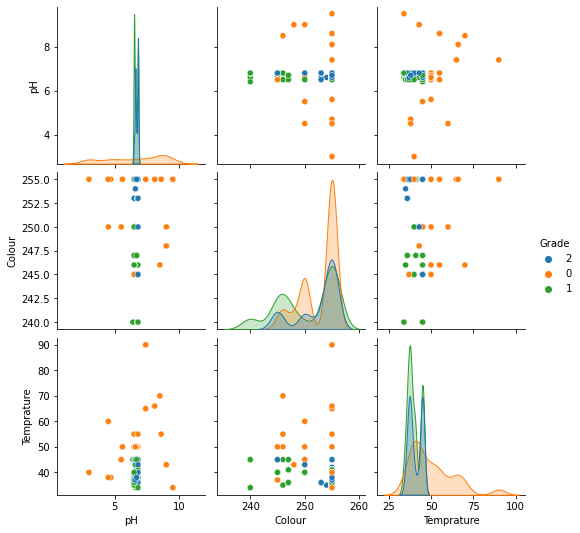

In [51]:
sns.pairplot(dados_cluster, hue='Grade')

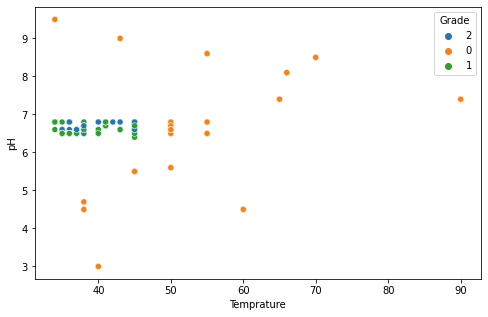

In [54]:
fig, axe = plt.subplots(figsize = (8,5))
axe = sns.scatterplot(data=dados_cluster, x='Temprature', y='pH', hue='Grade')

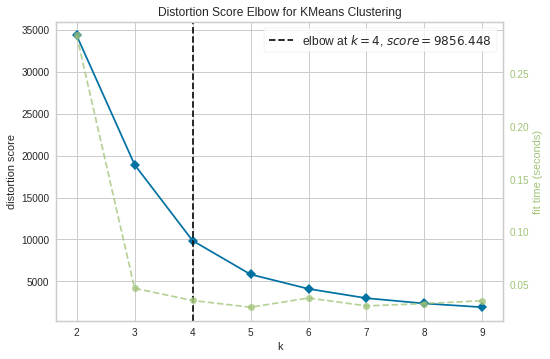

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1775f9fd90>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [66]:
kelbow_visualizer(KMeans(random_state=4), dados_cluster[['Temprature', 'pH']], k=(2,10))

In [69]:
kmeans = cluster.KMeans(4)
clusters = kmeans.fit_predict(dados_cluster[['Temprature', 'pH']])
pd.value_counts(clusters)


2    553
0    355
1    134
3     17
dtype: int64

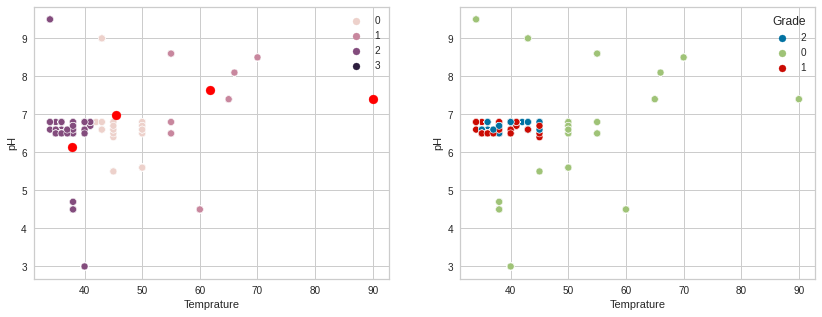

In [70]:
x_center, y_center = kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]
fig, (axe1,axe2) = plt.subplots(1,2, figsize=(14,5))
sns.scatterplot (data = dados_cluster, x='Temprature', y='pH', hue= clusters, ax=axe1)
axe1.scatter(x=x_center, y=y_center, s=80, color='red')
sns.scatterplot( data=dados_cluster, x='Temprature', y= 'pH', hue='Grade', ax=axe2)